## 一、信息熵

<font size=1 color="red"  font>衡量信息的不确定度</font>

<img style="float: left;" src="信息熵-基尼系数-1.png"  width="100%">

## 二、基尼系数

<img style="float: left;" src="信息熵-基尼系数-2.png"  width="100%">

### 1> 基础理解公式

<img style="float: left;" src="基尼系数-1.png"  width="100%">

### 2>使用基尼系数划分节点数据集

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)



In [5]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(X, y)

plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

- 封装函数：   
 1.split()：划分数据集；   
 2.gini()：计算数据集的基尼系数；    
 3.try_split()：寻找最佳的特征、特征值、基尼系数； 


In [8]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res += -p**2
    return res

# counter = Counter(y)：将向量 y 做成一个字典
# counter 的 key：y 中各种数据；
# counter 的value：key 对应的数据在 y 中的个数；
# Counter(list/tuple/str/array等序列)：以字典的形式返回 序列中所有元素及其数量；（可以起到去重的作用）

#res = 1-sum[(x_i)^2]

def try_split(X, y):
    
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                x_l, x_r, y_l, y_r = split(X, y, d, v)
                g = gini(y_l) + gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
                    
    return best_g, best_d, best_v

- 第一次划分

In [11]:
best_g, best_d, best_v = try_split(X, y)
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

gini(y1_l)
# 数据集 X1_l 的基尼系数：0.0


0.0

In [10]:
gini(y1_r)
# 数据集 X1_r 的基尼系数：0.5

0.5

- 第二次划分

In [12]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

gini(y2_l)
# 数据集 X2_l 的基尼系数：0.1680384087791495

0.1680384087791495

In [13]:
gini(y2_r)
# 数据集 X2_l 的基尼系数：0.04253308128544431

0.04253308128544431

- 基尼系数图像

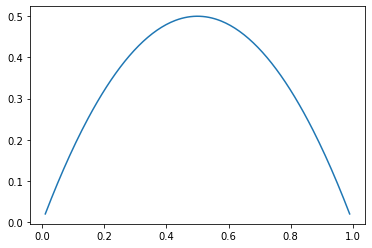

In [15]:
def gini(p):
    return -2*p**2+2*p

x=np.linspace(0.01, 0.99, 200)

plt.plot(x, gini(x))
plt.show()